#### Problem Statement:- 
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/dataset1-master/titanic_train.csv")

In [ ]:
data.head()

##### Observations
1)The Dataset contains both numerical and categorical data

2)Columnsn Age and Fare contains continuous data

3)Columns Survived, Sex, Embarked contains categorical data

4)Columns Sibsp and Parch contains discrit data

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
sns.heatmap(data.isna())

Here we can clearly see that the presence of white lines indicates the missing values in the columns.

In [ ]:
data['Survived'].unique()

Here we can see that there are two unique values present in the target 0 and 1. 0 = No, 1 = Yes. 

In [ ]:
data.describe()

In summarizing the data we can also observe that the dataset seems to be having more outliers as well as skewness in the data. The column Age and Fare has huge outliers from the max of 80 and 512 respectively which is quite far from their mean with their second quantile median(50%).

# Data visualization

In [ ]:
data.hist(figsize=(20,13))

In [ ]:
sns.countplot(data['Survived'])

The Label survived as two classes 0 and 1. We can clearly see that the passenger survived in this disaster are less which  we canobserve in class as mentioned as 1.


In [ ]:
sns.countplot(data['Pclass'])

Here we can see that passengers traveling in the third class are more and they are not survived. The passengers traveling in the 1st and 2nd class are less and they are more likely to be survived

In [ ]:
print(data["Sex"].value_counts())
sns.countplot(data['Sex'])


Here we can see that there are two classes male and female. male passengers are 577 and female passengers are 314. Here by observing the data we can see that the survival rate of female passengers are more than male passengers

In [ ]:
print(data["Embarked"].value_counts())
sns.countplot(data['Embarked'])

Here there are three classes S = Southampton, C = Cherbourg and Q = Queenstown. These are the places where passengers are boarded from. We can see that majority of passengers are boarded from "S" and "Q" has less passengers.

In [ ]:
print(data["Parch"].value_counts())
sns.factorplot('Parch',kind='count',data=data,hue='Survived')

From this plot we can see most of the passengers are travelled alone which is named as 0 in the plot. We can say almost 80% of the passengers are alone, 15% of the passengers are travelled either with their children or parents and remaining 5% of them are travelled with group.

# Correlation

In [ ]:
corr = data.corr()
corr

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), linewidths=.1,annot=True)
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlattion between each other. So we can check the multicollinearity problem using VIF if necessary.

# Dropping Columns

we can see that passengerid columns has no correlation with target variables, so we will drop it

In [ ]:
data.drop('PassengerId', axis=1,inplace=True)
data.drop('Name', axis=1, inplace=True)

In [ ]:
data.head()

# Outliers

In [ ]:
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,13))

From the above boxplot we can observe that outliers are present in Age,Sibsp,,Parch,Fare. We will not remove outliers from SibSP and Parch as they contain discrit data.But we will remove outliers from Age and Fare as they contain continuous data.

# Misssing Values

In [ ]:
data.isna().sum()

There are missing values present in the columns Age, Cabin, Embarked. Since the Age columns is importatnt we need to fill the missing values.

Age is a numerical column so we use median method to fill the missing values

Embarked is a categorical column so we use mode method to fill the missing values.

Cabin contain aphanumeric column and contain plenty of missing values so we cant use mean median mode method to fill the missing values.So we can either delete that column or we can fill that out with unknown values by using fillna() method.

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data['Cabin'] = data['Cabin'].fillna('U')

In [ ]:
data.isna().sum()

In [ ]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(data.isnull())

So we fill the null values nno null values are present in the dataset

# Removing Outliers

In [ ]:
variables = data[['Age','Fare']]

In [ ]:
from scipy.stats import zscore

In [ ]:
z=np.abs(zscore(variables))
# Creating new dataframe
new_data = data[(z<3).all(axis=1)]
new_data.head()

In [ ]:
print(data.shape)
print(new_data.shape)

In [ ]:
data_loss = (891-864)/891*100
data_loss


This is the percentage loss of our data. Here we are not loosing much data so i am removing the outliers

In [ ]:
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

data1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print(data.shape)
print(data1.shape)

# Skewness

In [ ]:
new_data.skew()

We can observe the features Pclass, SibSp, Parch and Fare has skewness. Since Pclass is categorical column so we should not remove skewness. Let's remove skewness in Age, SibSp, Parch and Fare which contains numerical data

In [ ]:
skewed_features = ["SibSp","Parch","Fare"]

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

In [ ]:
new_data[skewed_features] = scaler.fit_transform(new_data[skewed_features].values)
new_data[skewed_features].head()

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

# Encoding the data using LabelEncoder

In [ ]:
cols = ['Sex','Ticket','Cabin','Embarked']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
new_data[cols]= new_data[cols].apply(LE.fit_transform)

In [ ]:
new_data[cols].head()

In [ ]:
new_data.head()

# Separating the independat variable into x and y

In [ ]:
x = new_data.drop('Survived', axis=1)
y = new_data['Survived']

In [ ]:
x.head()

In [ ]:
y.value_counts()

The data is not balanced. Since we have class imbalancing issue in the dataset so we need to balance it. Here I am using oversampling method to balance the class.

In [ ]:
x.shape, y.shape

# Oversampling

In [69]:
!pip install imblearn


In [70]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [71]:
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

Data is balanced in both classes

# Scalling Data

In [72]:
x.shape, y.shape

((1074, 9), (1074,))

In [73]:

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [74]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.776276,0.432617,1.000000,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.881381,0.848336,0.518519,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.983483,0.448186,1.000000,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.072072,0.794478,0.355556,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.699700,0.450936,1.000000,1.0


# Modelling

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [77]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DT = DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    pred = DT.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8637770897832817  on Random_state  45


## Creating Train Test Split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Decision Tree

In [80]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)

print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test,predDT))


0.8544891640866873
[[131  23]
 [ 24 145]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       154
           1       0.86      0.86      0.86       169

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 85% Accuracy

# Random Forest Classifier

In [84]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)

print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test,predRF))

0.8730650154798761
[[135  19]
 [ 22 147]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       154
           1       0.89      0.87      0.88       169

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



Here We are getting 87% Accuracy

# Support Vector Machine Classifier

In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.848297213622291
[[139  15]
 [ 34 135]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.90      0.80      0.85       169

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 84% Accuracy

# Logistic Regression

In [86]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.826625386996904
[[129  25]
 [ 31 138]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       154
           1       0.85      0.82      0.83       169

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



Here we are getting 82% Accuracy

# Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score


In [89]:
print('DecisionTree:-',cross_val_score(DT,x,y,cv=5).mean())
print('Random Forest:-',cross_val_score(RF,x,y,cv=5).mean())
print('SVC:-',cross_val_score(svc,x,y,cv=5).mean())
print('Logistic Regression:-',cross_val_score(LR,x,y,cv=5).mean())

DecisionTree:- 0.8119973918713322
Random Forest:- 0.8566659421864811
SVC:- 0.8315235818300369
Logistic Regression:- 0.8026602912410346


Form the above we observe that Random Forest is our best fit model

# Hyper parameter tuning for best model

In [92]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[0,200],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [93]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'n_estimators': [0, 200]})

In [95]:
GCV.best_params_


{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'n_estimators': 200}

In [96]:
Titanic_survived = RandomForestClassifier(criterion='entropy',max_depth=30, max_features='auto', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.687306501548


Here final model gives 86% accuracy

# Roc Auc

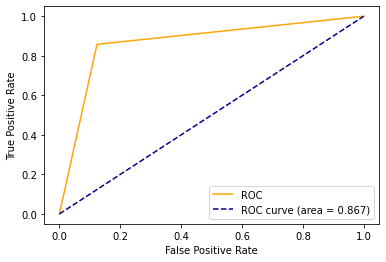

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate.

So the best model has the area under curve as 0.86.

# Saving the Model

In [99]:
import joblib

joblib.dump(Titanic_survived,'Titanic.obj')

['Titanic.obj']

In [100]:
ts_model = joblib.load('Titanic.obj')


# Conclusion

In [101]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Titanic_survived.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new


,Original,Predicted
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
318,1,1
319,0,0
320,1,1
321,0,0
